# GEO1302 - Modélisation et inversion en géophysique

# Programmation orientée objet

### Bernard Giroux
### Hiver 2018

### Version 1.0.1
---


# POO et Python

## Définition des classes

- Python est un language dynamique:
  - la définition des classes n’est pas nécéssairement fixée à l’avance
  - on peut ajouter des attributs à un objet en tout temps

In [1]:
import numpy as np

class MaillageTriangulaire:
    """
    Classe pour representer des maillages
    Aucun attribut ni méthode prédéfini
    """

mt = MaillageTriangulaire()  # création d'un objet MaillageTriangulaire
print(mt)

In [33]:
print(mt.__dict__)           # l'attribut spécial __dict__ contient la liste des attributs assignés à l'objet

{}


In [34]:
mt.noeuds = np.array([[0.0, 0.0],
                  [1.0, 0.0],
                  [0.0, 1.0]])
mt.triangles = np.array([[0, 1, 2]])

print(mt.__dict__)

{'triangles': array([[0, 1, 2]]), 'noeuds': array([[0., 0.],
       [1., 0.],
       [0., 1.]])}


- Il n'est pas possible de faire de même pour des _méthodes_
- En général, on défini à l'avance les attributs et les méthodes

In [35]:
class MaillageTriangulaire:
    """
    Classe pour representer des maillages
    """

    def __init__(self, n, t):
        """Constructeur """
        self.noeuds = n
        self.triangles = t
        
    def getLimites(self):
        """Retourne les min et max des noeuds
        """
        return np.hstack((self.noeuds.min(axis=0),
                          self.noeuds.max(axis=0)))


# création d'un objet
nod = np.array([[0.0,0.0], [1.0,0.0], [0.0,1.0]])
tri = np.array([[0, 1, 2]])

mt = MaillageTriangulaire(nod, tri)

print(mt)

In [36]:
print(mt.noeuds)

[[0. 0.]
 [1. 0.]
 [0. 1.]]


In [37]:
print(mt.__dict__)

{'triangles': array([[0, 1, 2]]), 'noeuds': array([[0., 0.],
       [1., 0.],
       [0., 1.]])}


### Appel des méthodes
- 2 options possibles
- la 1re notation est couramment utilisée dans d’autres languages comme C++, java, ...

In [38]:
lim = mt.getLimites()
print(lim)

[0. 0. 1. 1.]


In [39]:
lim = MaillageTriangulaire.getLimites(mt)
print(lim)

[0. 0. 1. 1.]


### Encapsulation

- Il est possible de _valider l’assignation aux attributs_

In [40]:
class MaillageTriangulaire:
    """
    Classe pour representer des maillages
    """

    def __init__(self, n, t):
        """Constructeur """
        self.noeuds = n
        self.triangles = t
        
    def getLimites(self):
        """Retourne les min et max des noeuds
        """
        return np.hstack((self.noeuds.min(axis=0),
                          self.noeuds.max(axis=0)))

    @property
    def noeuds(self):
        return self._noeuds

    @noeuds.setter
    def noeuds(self, val):
        tmp = np.array(val, dtype=np.float64)
        if tmp.ndim != 2:
            raise ValueError('2D array needed')
        if tmp.shape[0]<3:
            raise ValueError('3 nodes or more needed')
        if tmp.shape[1] != 2:
            raise ValueError('nodes: x z needed')
        self._noeuds = tmp
        
    @property
    def triangles(self):
        return self._triangles
    
    @triangles.setter
    def triangles(self, val):
        tmp = np.array(val, dtype=np.int)
        if tmp.ndim != 2:
            raise ValueError('2D array needed')
        if tmp.shape[1] != 3:
            raise ValueError('3 indices needed')
        self._triangles = tmp


### Constructeur

- Un constructeur est une méthode spéciale servant à créer les objets;
- Le constructeur porte le nom `__init__`;
- Lorsque l’assignation des attributs est validée (`setter`), le constructeur permet de valider les valeurs assignées aux attributs dès le départ.

In [41]:
tri = np.array([[0, 1, 2, 3]])
mt2 = MaillageTriangulaire(nod, tri)

ValueError: 3 indices needed

## Copie d'objets

En Python, toutes les variables sont des références vers des objets

In [42]:
tri = np.array([[0, 1, 2]])
mt = MaillageTriangulaire(nod, tri)
mt2 = mt
print(mt.triangles)
mt2.triangles = np.array([[5, 6, 7]])
print(mt.triangles)

[[0 1 2]]
[[5 6 7]]


Pour dupliquer un objet, il faut utiliser le module `copy`

In [43]:
import copy

mt2 = copy.copy(mt)
mt2.triangles = np.array([[3, 4, 5]])
print(mt.triangles)
print(mt2.triangles)

[[5 6 7]]
[[3 4 5]]


`copy.copy` copie l’objet et les références qu’il contient
- si une de ces référence est un objet contenant des références, le 2e niveau de référence n’est pas dupliqué...
- on parle de _shallow copy_

In [44]:
class ID:
    def __init__(self, v = 0):
        self.value = v

mt.id = ID()

mt2 = copy.copy(mt)

print(mt.id.value)
print(mt2.id.value)

mt2.id.value = 2
print(mt.id.value)
print(mt2.id.value)

0
0
2
2


`copy.deepcopy` permet de régler le problème

In [45]:
mt2 = copy.deepcopy(mt)

print(mt.id.value)
print(mt2.id.value)

mt2.id.value = 4
print(mt.id.value)
print(mt2.id.value)

2
2
2
4


## Classes dérivées et héritage

- Problème type :
  - On veut regrouper des données de terrain et de labo, traités ou non, dans une liste, pour pouvoir faire une série d’opérations communes pour ces données.
- L’héritage est très pratique lorsqu’on veut regrouper des entitées différentes qui présentent des caractéristiques communes et des fonctionnalités communes.
- Le point de départ est de définir une classe mère
  - Ici, la classe mère est une classe abstraite, mais ce n'est pas obligatoire

In [2]:
from abc import ABCMeta, abstractmethod

class Donnees(metaclass=ABCMeta):
    def __init__(self, dtype):
        self.type = dtype
        
    @abstractmethod
    def getValeurs(self): 
        pass
    @abstractmethod
    def getLocalisation(self): 
        pass
    @abstractmethod
    def plot(self, fig=None):
        pass

- Un peut maintenant créer une classe fille pour des données de terrain

In [3]:
class DonneesTerrain(Donnees):
    def __init__(self, dtype, data, loc):
        Donnees.__init__(self, dtype)
        self.val = np.array(data)
        self.locali = np.array(loc)
        
    def getValeurs(self):
        return self.val
        
    def getLocalisation(self):
        return self.locali

dt = DonneesTerrain('gravi', [4.0, 6.4, 3.1], [[3.0, 4.5],[7.6, 3.2],[6.5, 4.2]])

TypeError: Can't instantiate abstract class DonneesTerrain with abstract methods plot

- Il faut que toutes les méthodes abstraites de la classe mère soient définies dans la classe fille

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class DonneesTerrain(Donnees):
    def __init__(self, dtype, data, loc):
        Donnees.__init__(self, dtype)
        self.val = np.array(data)
        self.locali = np.array(loc)
        
    def getValeurs(self):
        return self.val
        
    def getLocalisation(self):
        return self.locali

    def plot(self, fig=None):
        if fig == None:
            fig = plt.figure()

        norm = mpl.colors.Normalize(vmin=np.min(self.val), vmax=np.max(self.val))
        cmap = cm.jet
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        for n in np.arange(len(self.val)):
            plt.plot(self.locali[n,0], self.locali[n,1], 'o',
                     markerfacecolor=m.to_rgba(self.val[n]),
                     markeredgecolor=m.to_rgba(self.val[n]))
        return fig

dt = DonneesTerrain('gravi', [4.0, 6.4, 3.1], [[3.0, 4.5],[7.6, 3.2],[6.5, 4.2]])
f = dt.plot()

- On a aussi des mesures en labo

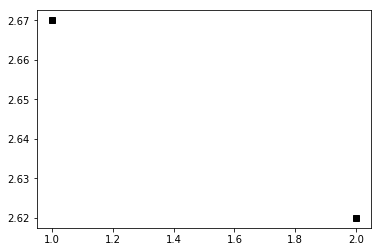

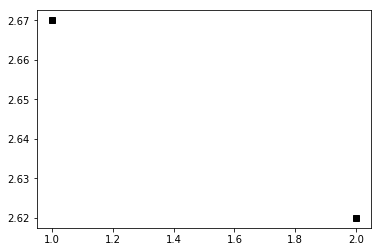

In [5]:
class DonneesLabo(Donnees):
    def __init__(self, dtype, val, loc, no):
        Donnees.__init__(self, dtype)
        self.val = val
        self.loc = loc
        self.no_ech = no
        
    def getValeurs(self):
        return self.val
        
    def getLocalisation(self):
        return self.loc

    def plot(self, fig=None):
        if fig == None:
            fig = plt.figure()

        plt.plot(self.no_ech, self.val, 'sk')
        return fig
    
dl = DonneesLabo('densité', 2.67, 'Site no 2', 1)
dl2 = DonneesLabo('densité', 2.62, 'Site no 2', 2)

f = dl.plot()
dl2.plot(f)

- On peut combiner toutes nos données dans une liste et appeler une méthode commune

In [51]:
data = [dt, dl, dl2]

for d in data:
    print(d.getLocalisation())

[[3.  4.5]
 [7.6 3.2]
 [6.5 4.2]]
Site no 2
Site no 2


## Surcharge des méthodes

- Surcharge: une méthode d'une classe mère est redéfinie dans une classe fille
- Les méthodes du language Python qui peuvent être surchargées sont données au lien http://docs.python.org/3/reference/datamodel.html#specialnames
    - Par exemple, la fonction `print` fait appel à la méthode `__str__` définie pour la classe mère `object`

In [52]:
class MaillageTriangulaire:
    def __init__(self, n, t):
        """Constructeur
        """
        self.noeuds = n
        self.triangles = t
        
    def getLimites(self):
        """Retourne les min et max des noeuds
        """
        return np.hstack((self.noeuds.min(axis=0),
                          self.noeuds.max(axis=0)))
    
    @property
    def noeuds(self):
        return self._noeuds
    @noeuds.setter
    def noeuds(self, val):
        tmp = np.array(val, dtype=np.float64)
        if tmp.ndim != 2:
            raise ValueError('2D array needed')
        if tmp.shape[0] < 3:
            raise ValueError('3 nodes or more needed')
        if tmp.shape[1] != 2:
            raise ValueError('nodes: x z needed')
        
        self._noeuds = tmp
        
    @property
    def triangles(self):
        return self._triangles
    @triangles.setter
    def triangles(self, val):
        tmp = np.array(val, dtype=np.int)
        if tmp.ndim != 2:
            raise ValueError('2D array needed')
        if tmp.shape[1] != 3:
            raise ValueError('3 indices needed')
        
        self._triangles = tmp
        
    def __str__(self):
        return self.__class__.__name__+' ('+str(self.noeuds.shape[0])+' noeuds, '\
                                          +str(self.triangles.shape[0])+' triangles)'
        

nodes = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
tri = np.array([[0, 1, 2]])
mt = MaillageTriangulaire(nodes, tri)
print(mt)

MaillageTriangulaire (3 noeuds, 1 triangles)


---

## Organisation des fichiers

- Pour que votre classe soit facilement réutilisable,
  - elle doit être définie et sauvegardée dans un fichier;
  - elle peut ainsi être importée dans un autre fichier.
- Ex.: la classe `MaillageTriangulaire` est définie dans un fichier `poo.py`, lui même dans un répertoire nommé `geo1302`

In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [54]:
import geo1302.poo
import numpy as np

nod = np.array([[0.0, 0.0],
                [1.0, 0.0],
                [0.0, 1.0]])
tri = np.array([[0, 1, 2]])
mt = geo1302.poo.MaillageTriangulaire(nod, tri)
print(mt)

MaillageTriangulaire (3 noeuds, 1 triangles)


In [55]:
from geo1302.poo import MaillageTriangulaire

mt2 = MaillageTriangulaire(nod, tri)
print(mt2)

MaillageTriangulaire (3 noeuds, 1 triangles)


### Tests et déboguage

- Il est possible de tester votre code sans créer un 2e fichier
- Il faut simplement ajouter à la fin du fichier poo.py

```python
if __name__ == '__main__':
    # test création MaillageTriangulaire
    nod = np.array([[0.0, 0.0],
                    [1.0, 0.0],
                    [0.0, 1.0]])
    tri = np.array([[0, 1, 2]])
    mt = utils.MaillageTriangulaire(nod, tri)
    print(mt.noeuds)
```

- Dans un terminal, saisir `python poo.py`
  - la partie après `if __name__ == '__main__'` sera exécutée